In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import time 


with open("dataset\\kddcup.names", 'r') as f: 
	print(f.read()) 


back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [2]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [3]:
 with open("dataset\\training_attack_types", 'r') as f: 
	print(f.read()) 


back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [4]:
attacks_types = { 
'normal': 'normal', 
'back': 'dos', 
'buffer_overflow': 'u2r', 
'ftp_write': 'r2l', 
'guess_passwd': 'r2l', 
'imap': 'r2l', 
'ipsweep': 'probe', 
'land': 'dos', 
'loadmodule': 'u2r', 
'multihop': 'r2l', 
'neptune': 'dos', 
'nmap': 'probe', 
'perl': 'u2r', 
'phf': 'r2l', 
'pod': 'dos', 
'portsweep': 'probe', 
'rootkit': 'u2r', 
'satan': 'probe', 
'smurf': 'dos', 
'spy': 'r2l', 
'teardrop': 'dos', 
'warezclient': 'r2l', 
'warezmaster': 'r2l', 
} 


In [5]:
path = "dataset\\kddcup.data_10_percent.gz"
df = pd.read_csv(path, names = columns) 

# Adding Attack Type column 
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]]) 
df.head() 



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [6]:
df.shape 

(494021, 43)

In [7]:
df['target'].value_counts()


target
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

In [8]:
df['Attack Type'].value_counts()

Attack Type
dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: count, dtype: int64

In [9]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [10]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [11]:
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['flag', 'service', 'protocol_type']

In [12]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

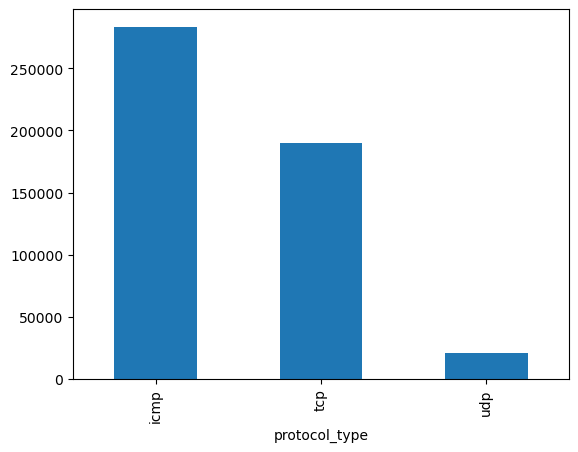

In [13]:
bar_graph('protocol_type')

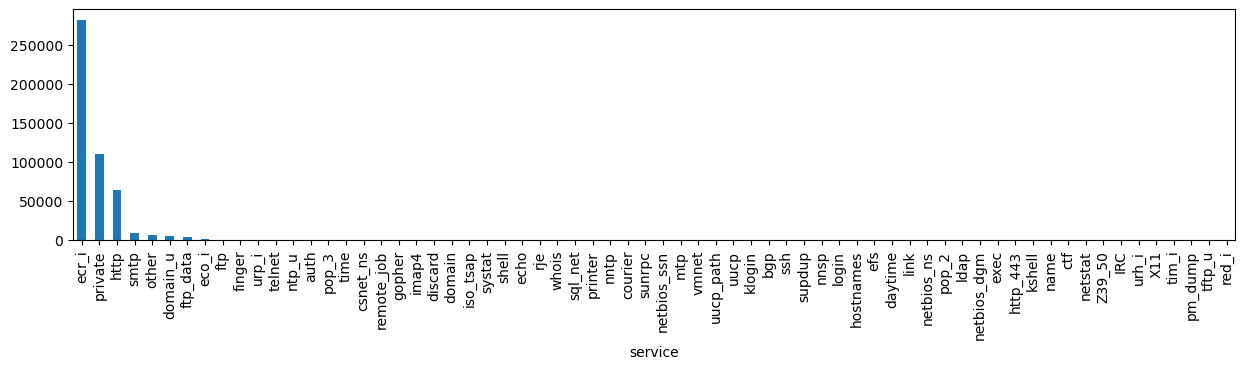

In [14]:
plt.figure(figsize=(15,3))
bar_graph('service')

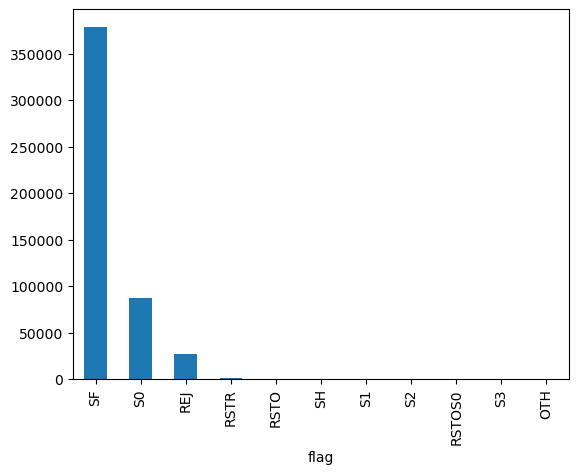

In [15]:
bar_graph('flag')

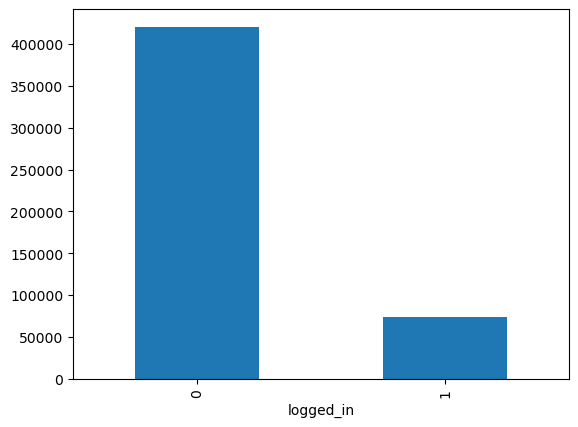

In [16]:
bar_graph('logged_in')

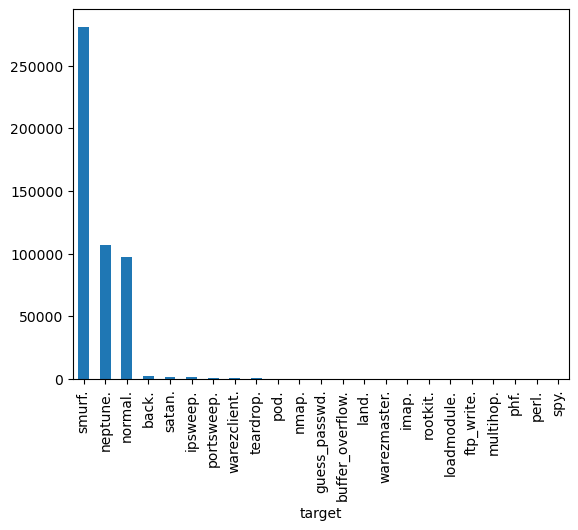

In [17]:
bar_graph('target')

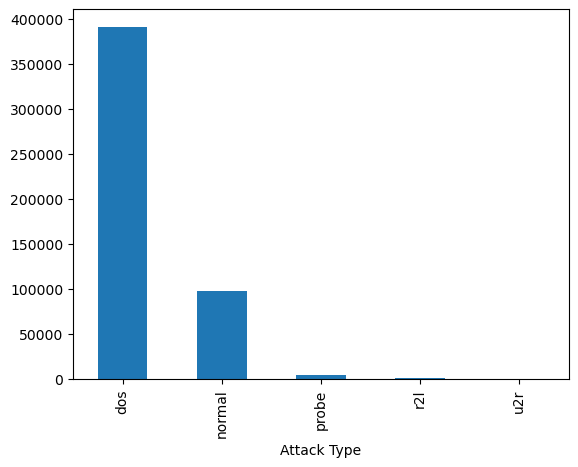

In [18]:
bar_graph('Attack Type')

In [19]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

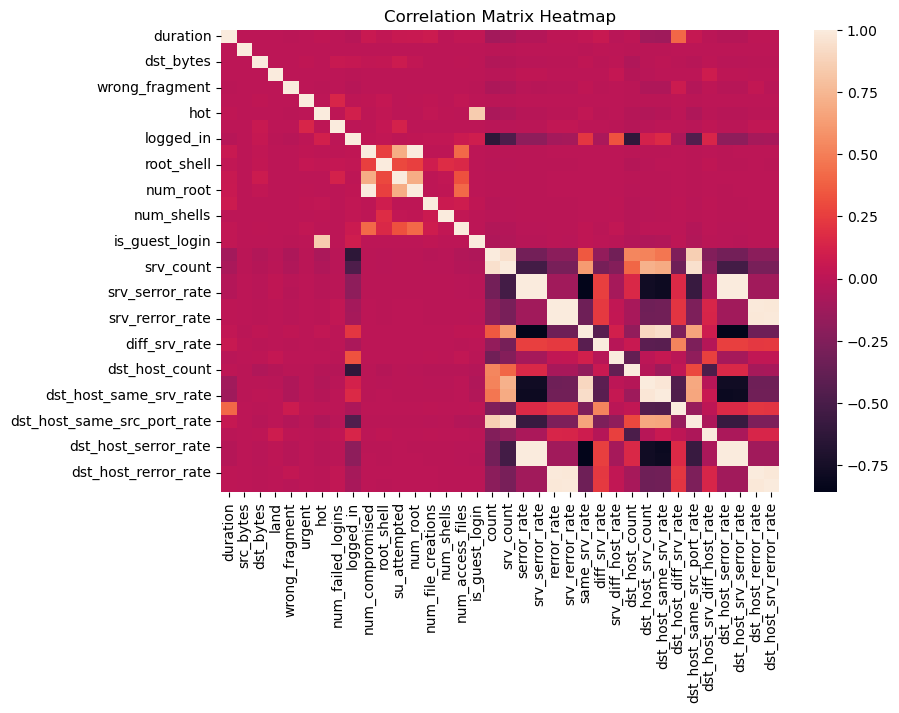

In [20]:
df = df.dropna(axis=1)
df = df[[col for col in df if df[col].nunique() > 1]]
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
plt.figure(figsize=(9, 6))
sns.heatmap(corr)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [21]:
df['num_root'].corr(df['num_compromised'])

0.9938277978750971

In [22]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.9983615072725553

In [23]:
df['srv_count'].corr(df['count'])

0.9436670688873966

In [24]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539823285

In [25]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.973685457296524

In [26]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173370796

In [27]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371108135

In [28]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.9278080342693468

In [29]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989546630321118

In [30]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.9449263676771811

In [31]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9986729680107838

In [32]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.9978353003731405

In [33]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.9978492485672809

In [34]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.9993041091845912

In [35]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.9869947924956788

In [36]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663427309738

In [37]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540753726

In [38]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438849232

In [39]:
df.drop('num_root',axis = 1,inplace = True)

df.drop('srv_serror_rate',axis = 1,inplace = True)

df.drop('srv_rerror_rate',axis = 1, inplace=True)

df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

df.drop('dst_host_serror_rate',axis = 1, inplace=True)

df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [40]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [41]:
df.shape

(494021, 33)

In [42]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [43]:
numeric_df = df.select_dtypes(include=['number'])
df_std = numeric_df.std()
df_std = df_std.sort_values(ascending=True)
print(df_std)

urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

In [44]:
df['protocol_type'].value_counts()

protocol_type
icmp    283602
tcp     190065
udp      20354
Name: count, dtype: int64

In [45]:
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [46]:
df['flag'].value_counts()

flag
SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: count, dtype: int64

In [47]:
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [48]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [49]:
df.drop('service',axis = 1,inplace= True)

In [50]:
df.shape

(494021, 32)

In [51]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [52]:
df.dtypes


duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [54]:
df = df.drop(['target',], axis=1)
print(df.shape)

(494021, 31)


In [55]:
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
model1 = GaussianNB()

start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  0.6669847965240479


In [58]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.2739896774291992


In [59]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))
print("Precision score is:",precision_score(Y_test, Y_test_pred1, average='weighted'))
print("Recall score is:",recall_score(Y_test, Y_test_pred1, average='weighted'))

Train score is: 0.8795114110829804
Test score is: 0.8790384414851528
Precision score is: 0.9664786959616349
Recall score is: 0.8790384414851528


In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  0.978161096572876


In [62]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.026999950408935547


In [63]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))
print("Precision score is:",precision_score(Y_test, Y_test_pred2, average='weighted'))
print("Recall score is:",recall_score(Y_test, Y_test_pred2, average='weighted'))

Train score is: 0.9905829108684749
Test score is: 0.9905230421954646


C:\Users\amita\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score is: 0.990204393538205
Recall score is: 0.9905230421954646


In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
model3 = RandomForestClassifier(n_estimators=30)

start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  9.299614191055298


In [66]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.47599244117736816


In [67]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))
print("Precision score is:",precision_score(Y_test, Y_test_pred3, average='weighted'))
print("Recall score is:",recall_score(Y_test, Y_test_pred3, average='weighted'))

Train score is: 0.9999788515803912
Test score is: 0.9996933023364228
Precision score is: 0.9996907592963262
Recall score is: 0.9996933023364228


In [68]:
from sklearn.svm import SVC

In [69]:
model4 = SVC(gamma = 'scale')

start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  122.89011812210083


In [70]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  73.15209174156189


In [71]:
print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test,Y_test))
print("Precision score is:",precision_score(Y_test, Y_test_pred4, average='weighted'))
print("Recall score is:",recall_score(Y_test, Y_test_pred4, average='weighted'))

Train score is: 0.9987552644458811
Test score is: 0.9987916112055059
Precision score is: 0.9987821882050266
Recall score is: 0.9987916112055059


In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
model5 = LogisticRegression(max_iter=1200000)

start_time = time.time()
model5.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  26.695145845413208


In [74]:
start_time = time.time()
Y_test_pred5 = model5.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.02499222755432129


In [75]:
print("Train score is:", model5.score(X_train, Y_train))
print("Test score is:",model5.score(X_test,Y_test))
print("Precision score is:",precision_score(Y_test, Y_test_pred5, average='weighted'))
print("Recall score is:",recall_score(Y_test, Y_test_pred5, average='weighted'))

Train score is: 0.9935285835997028
Test score is: 0.9935286792985211
Precision score is: 0.993628165579533
Recall score is: 0.9935286792985211


In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
model6 = KNeighborsClassifier(n_neighbors=5)

start_time = time.time()
model6.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time:", end_time - start_time)

Training time: 0.3130199909210205


In [78]:
start_time = time.time()
Y_test_pred6 = model6.predict(X_test)
end_time = time.time()
print("Testing time:", end_time - start_time)

Testing time: 81.98245215415955


In [79]:
print("Train score:", model6.score(X_train, Y_train))
print("Test score:", model6.score(X_test, Y_test))
print("Precision score is:",precision_score(Y_test, Y_test_pred6, average='weighted'))
print("Recall score is:",recall_score(Y_test, Y_test_pred6, average='weighted'))

Train score: 0.9993081445585116
Test score: 0.9990124335232814
Precision score is: 0.9990130087787374
Recall score is: 0.9990124335232814


In [80]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [81]:
model7 = LinearDiscriminantAnalysis()

start_time = time.time()
model7.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time:", end_time - start_time)

Training time: 1.8988513946533203


In [82]:
start_time = time.time()
Y_test_pred7 = model7.predict(X_test)
end_time = time.time()
print("Testing time:", end_time - start_time)

Testing time: 0.026992082595825195


In [83]:
print("Train score:", model7.score(X_train, Y_train))
print("Test score:", model7.score(X_test, Y_test))
print("Precision score is:",precision_score(Y_test, Y_test_pred7, average='weighted'))
print("Recall score is:",recall_score(Y_test, Y_test_pred7, average='weighted'))

Train score: 0.9897551013009299
Test score: 0.989535475718746
Precision score is: 0.9896540628738378
Recall score is: 0.989535475718746


<BarContainer object of 7 artists>

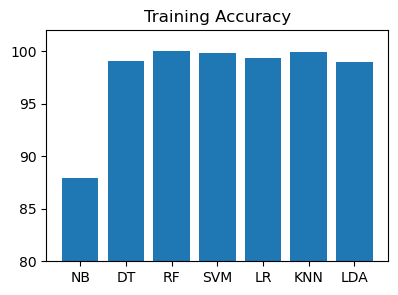

In [84]:
names = ['NB','DT','RF','SVM','LR','KNN','LDA']
values = [87.951,99.058,99.997,99.875,99.352,99.930,98.975]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.title("Training Accuracy")
plt.bar(names,values)

In [85]:
f.savefig('training_accuracy_figure.png',bbox_inches='tight')

<BarContainer object of 7 artists>

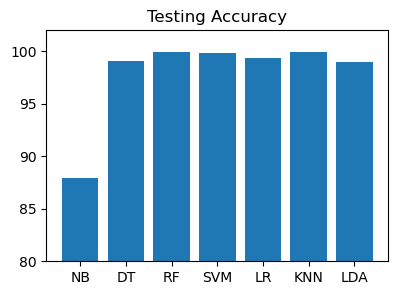

In [86]:
names = ['NB','DT','RF','SVM','LR','KNN','LDA']
values = [87.903,99.052,99.963,99.879,99.352,99.901,98.953]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.title("Testing Accuracy")
plt.bar(names,values)

In [87]:
f.savefig('test_accuracy_figure.png',bbox_inches='tight')

<BarContainer object of 7 artists>

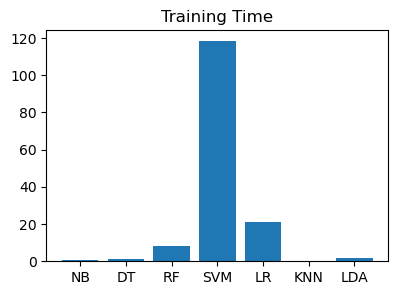

In [88]:
names = ['NB','DT','RF','SVM','LR','KNN','LDA']
values = [0.48774,0.96802,8.3321,118.23169,20.92322,0.28801,1.92800]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.title("Training Time")
plt.bar(names,values)

In [89]:
f.savefig('train_time_figure.png',bbox_inches='tight')

<BarContainer object of 7 artists>

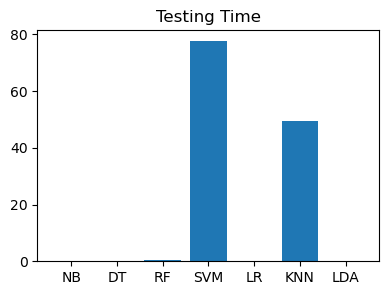

In [90]:
names = ['NB','DT','RF','SVM','LR','KNN','LDA']
values = [0.19648,0.02199,0.41401,77.55077,0.01999,49.43088,0.01799]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.title("Testing Time")
plt.bar(names,values)

In [91]:
f.savefig('test_time_figure.png',bbox_inches='tight')

In [92]:
import pickle

with open('model1.pkl', 'wb') as file:
    pickle.dump(model1, file)

In [93]:
import pickle

with open('model2.pkl', 'wb') as file:
    pickle.dump(model2, file)

In [94]:
import pickle

with open('model3.pkl', 'wb') as file:
    pickle.dump(model3, file)

In [95]:
import pickle

with open('model4.pkl', 'wb') as file:
    pickle.dump(model4, file)

In [96]:
import pickle

with open('model5.pkl', 'wb') as file:
    pickle.dump(model5, file)

In [97]:
import pickle

with open('model6.pkl', 'wb') as file:
    pickle.dump(model6, file)

In [98]:
import pickle

with open('model7.pkl', 'wb') as file:
    pickle.dump(model7, file)